Maestria inteligencia artificial.  
Ejercicio práctico clase 1
Grupo 8
Integrantes:
- Ivan Vega
- Danny Sagal
- Dylan Perez 




Cargue una imagen distinta a la trabajada en clase y aplique todas las operaciones básicas de modificación de la imagen usando una de las librerías vistas en clase (PIL u OpenCV)

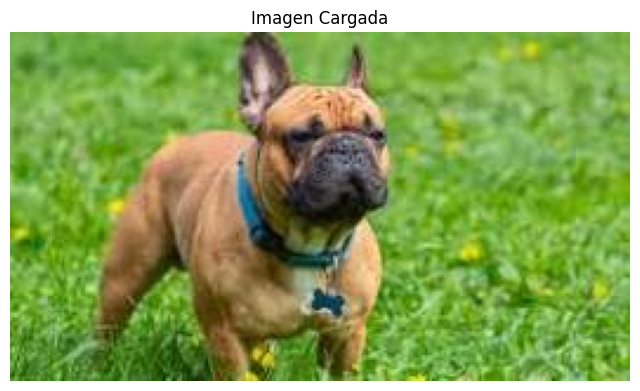

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Cargar la imagen
# Reemplaza 'nombre_de_tu_imagen.jpg' por la ruta de tu archivo

ruta_archivo = "C:/MAESTRIA/TEST/Imagenes/bulldog.jpg"
try:
    img = mpimg.imread(ruta_archivo) 
    
    # 2. Mostrar la imagen
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    
    # 3. Configurar la visualización
    plt.title("Imagen Cargada")
    plt.axis('off')  # Oculta los ejes (coordenadas de píxeles)
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo de imagen. Asegúrate de que esté en la misma carpeta.")

Dimensiones: 263px de ancho x 148px de alto
Formato: JPEG
Modo de color: RGB


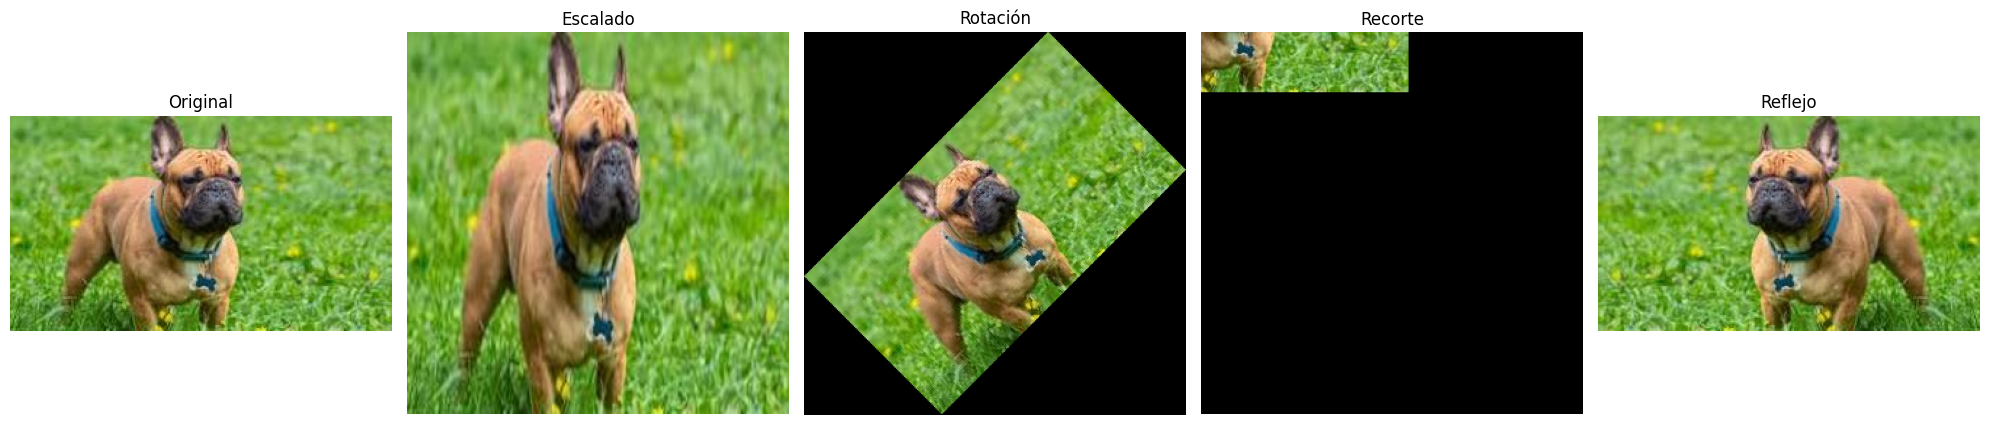

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

imagen = "C:/MAESTRIA/TEST/Imagenes/bulldog.jpg"
# 1. Cargar la imagen
img = Image.open(imagen)

# Obtener información
ancho, alto = img.size
formato = img.format  # Ejemplo: 'JPEG', 'PNG'
modo = img.mode      # Ejemplo: 'RGB', 'RGBA', 'L' (escala de grises)

print(f"Dimensiones: {ancho}px de ancho x {alto}px de alto")
print(f"Formato: {formato}")
print(f"Modo de color: {modo}")

# A. ESCALADO (Resizing)
# Definimos el nuevo tamaño en una tupla (ancho, alto)
img_resizada = img.resize((300, 300))

# B. ROTACIÓN
# Girar 45 grados. 'expand=True' ajusta el lienzo para que no se corten las esquinas
img_rotada = img.rotate(45, expand=True)

# C. RECORTE (Cropping)
# Definimos la caja: (izquierda, superior, derecha, inferior)
caja = (100, 100, 400, 400)
img_recortada = img.crop(caja)

# D. REFLEJO (Flip)
# FLIP_LEFT_RIGHT para espejo horizontal, FLIP_TOP_BOTTOM para vertical
img_reflejada = img.transpose(Image.FLIP_LEFT_RIGHT)

# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

axs[0].imshow(img); axs[0].set_title("Original")
axs[1].imshow(img_resizada); axs[1].set_title("Escalado")
axs[2].imshow(img_rotada); axs[2].set_title("Rotación")
axs[3].imshow(img_recortada); axs[3].set_title("Recorte")
axs[4].imshow(img_reflejada); axs[4].set_title("Reflejo")

for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()

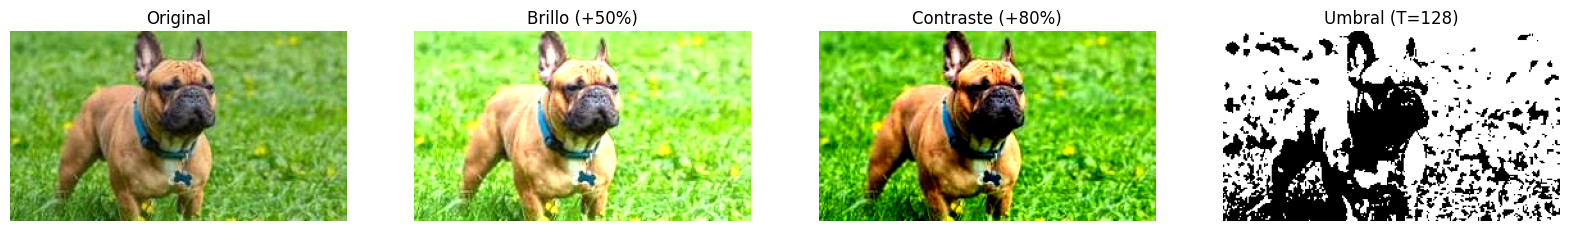

In [5]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

imagen = "C:/MAESTRIA/TEST/Imagenes/bulldog.jpg"
# 1. Cargar la imagen
img = Image.open(imagen)

# --- OPERACIONES DE PUNTO ---

# A. Ajuste de Brillo
# 1.0 es original, < 1.0 oscurece, > 1.0 aclara
enhancer_brillo = ImageEnhance.Brightness(img)
img_brillo = enhancer_brillo.enhance(1.5) # Aumentar 50%

# B. Ajuste de Contraste
# 1.0 es original, < 1.0 reduce contraste, > 1.0 aumenta
enhancer_contraste = ImageEnhance.Contrast(img)
img_contraste = enhancer_contraste.enhance(1.8) # Aumentar contraste significativamente

# C. Umbralización (Thresholding)
# Primero convertimos a escala de grises ('L')
img_gris = img.convert('L')
umbral = 128
# Si el píxel es > umbral, ponemos 255 (blanco), si no 0 (negro)
img_umbral = img_gris.point(lambda p: 255 if p > umbral else 0, mode='1')

# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title("Original")

axs[1].imshow(img_brillo)
axs[1].set_title("Brillo (+50%)")

axs[2].imshow(img_contraste)
axs[2].set_title("Contraste (+80%)")

axs[3].imshow(img_umbral, cmap='gray')
axs[3].set_title(f"Umbral (T={umbral})")

for ax in axs: ax.axis('off')
plt.show()

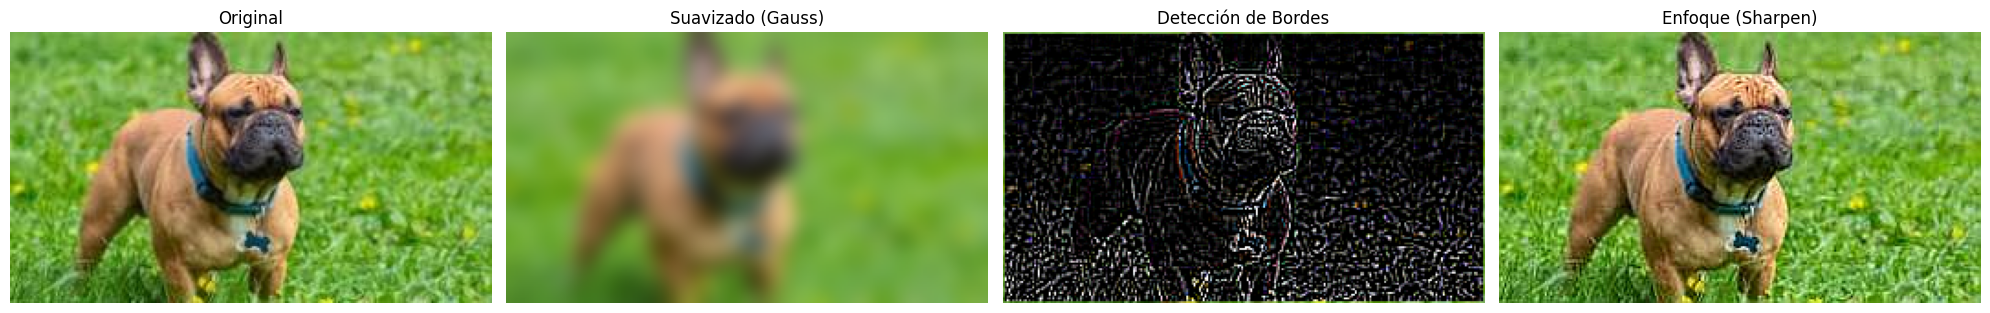

In [6]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

imagen = "C:/MAESTRIA/TEST/Imagenes/bulldog.jpg"
# 1. Cargar la imagen
img = Image.open(imagen)

# --- OPERACIONES DE VECINDAD ---

# A. Suavizado (Blurring)
# Usa un kernel de promedio para "difuminar" la imagen
img_blur = img.filter(ImageFilter.BLUR)
# Para un control más fuerte, se puede usar GaussianBlur
img_gauss = img.filter(ImageFilter.GaussianBlur(radius=5))

# B. Detección de Bordes (Find Edges)
# Resalta las siluetas donde hay cambios bruscos de color
img_bordes = img.filter(ImageFilter.FIND_EDGES)

# C. Enfoque (Sharpening)
# Mejora el detalle en los bordes
img_enfoque = img.filter(ImageFilter.SHARPEN)

# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title("Original")

axs[1].imshow(img_gauss)
axs[1].set_title("Suavizado (Gauss)")

axs[2].imshow(img_bordes)
axs[2].set_title("Detección de Bordes")

axs[3].imshow(img_enfoque)
axs[3].set_title("Enfoque (Sharpen)")

for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()

Tome una foto con la cámara de su computador, imprima sus características como tamaño y forma, luego recórtela para que solo se pueda observar los ojos de una persona.

In [ ]:
import cv2

# 1. Inicializar la cámara
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

if not cap.isOpened():
    print("Error: No se pudo acceder a la cámara.")
else:
    print("Cámara abierta. Presiona 's' para capturar y recortar los ojos.")

    while True:
        ret, frame = cap.read()
        if not ret: break

        # Efecto espejo para facilitar el encuadre
        frame = cv2.flip(frame, 1)
        cv2.imshow('Presiona S para capturar', frame)

        key = cv2.waitKey(1) & 0xFF

        if key == ord('s'):
            # --- PARTE 1: IMPRIMIR CARACTERÍSTICAS ---
            # shape devuelve (alto, ancho, canales)
            alto, ancho, canales = frame.shape
            # size devuelve el total de píxeles (alto * ancho * canales)
            tamano_total = frame.size 
            
            print("\n--- CARACTERÍSTICAS DE LA IMAGEN ---")
            print(f"Forma (Shape): {frame.shape}")
            print(f"Resolución: {ancho} de ancho x {alto} de alto")
            print(f"Canales: {canales} (BGR)")
            print(f"Tamaño total en memoria: {tamano_total} bytes")
            
            # --- PARTE 2: RECORTE DE OJOS (ROI) ---
            # Definimos una zona proporcional donde suelen estar los ojos
            # Sintaxis: frame[y_inicio : y_fin, x_inicio : x_fin]
            y_inicio, y_fin = int(alto * 0.45), int(alto * 0.60)
            x_inicio, x_fin = int(ancho * 0.3), int(ancho * 0.80)
            
            ojos_recortados = frame[y_inicio:y_fin, x_inicio:x_fin]

            # Mostrar los resultados
            cv2.imshow("Solo Ojos", ojos_recortados)
            cv2.imwrite("ojos_recorte.jpg", ojos_recortados)
            print("\n¡Recorte guardado como 'ojos_recorte.jpg'!")
            
            # Esperar a que el usuario cierre la ventana de los ojos
            cv2.waitKey(0)
            break
        
        elif key == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

Cámara abierta. Presiona 's' para capturar y recortar los ojos.

--- CARACTERÍSTICAS DE LA IMAGEN ---
Forma (Shape): (480, 640, 3)
Resolución: 640 de ancho x 480 de alto
Canales: 3 (BGR)
Tamaño total en memoria: 921600 bytes

¡Recorte guardado como 'ojos_recorte.jpg'!


Resultados:

Cámara abierta. Presiona 's' para capturar y recortar los ojos.

--- CARACTERÍSTICAS DE LA IMAGEN ---
Forma (Shape): (480, 640, 3)
Resolución: 640 de ancho x 480 de alto
Canales: 3 (BGR)
Tamaño total en memoria: 921600 bytes

¡Recorte guardado como 'ojos_recorte.jpg'

A la misma imagen tomada con la cámara, rotéla 180 grados, realice el reflejo de ella y mejore su enfoque si es posible.

Dimensiones: 558px de ancho x 511px de alto
Formato: JPEG
Modo de color: RGB


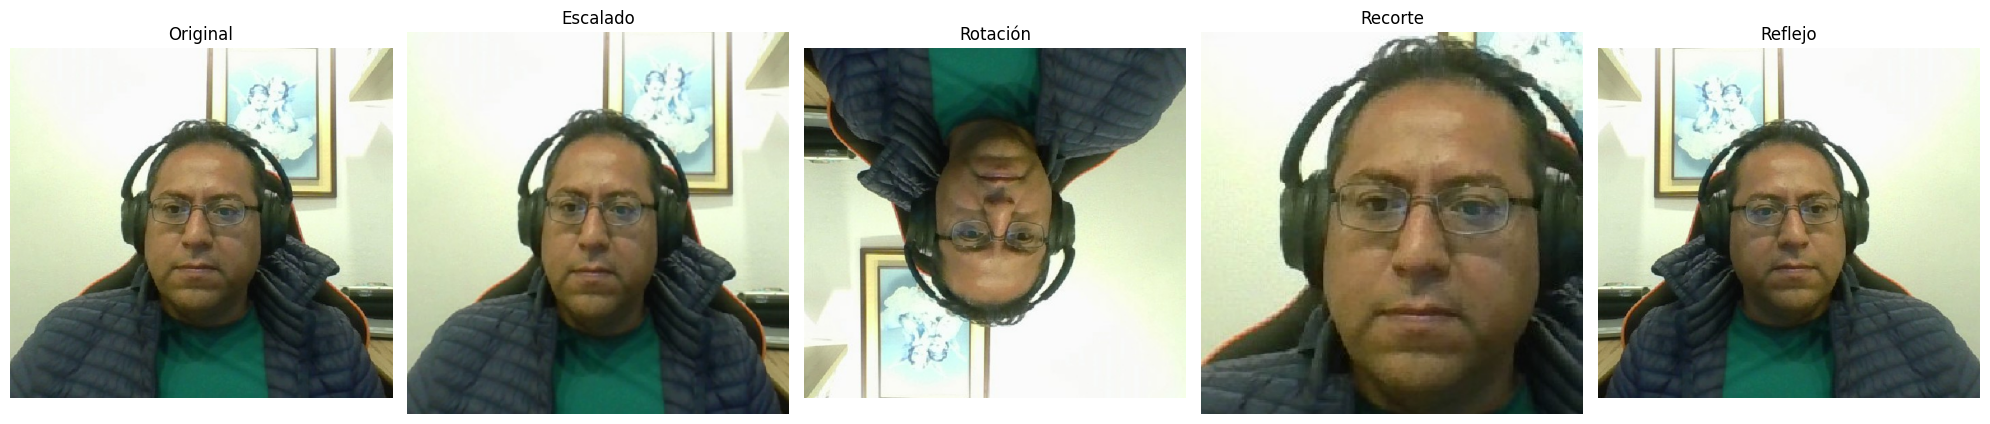

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

imagen = "C:/MAESTRIA/TEST/Imagenes/CapturaCamara.jpg"
# 1. Cargar la imagen
img = Image.open(imagen)

# Obtener información
ancho, alto = img.size
formato = img.format  # Ejemplo: 'JPEG', 'PNG'
modo = img.mode      # Ejemplo: 'RGB', 'RGBA', 'L' (escala de grises)

print(f"Dimensiones: {ancho}px de ancho x {alto}px de alto")
print(f"Formato: {formato}")
print(f"Modo de color: {modo}")

# A. ESCALADO (Resizing)
# Definimos el nuevo tamaño en una tupla (ancho, alto)
img_resizada = img.resize((300, 300))

# B. ROTACIÓN
# Girar 180 grados. 'expand=True' ajusta el lienzo para que no se corten las esquinas
img_rotada = img.rotate(180, expand=True)

# C. RECORTE (Cropping)
# Definimos la caja: (izquierda, superior, derecha, inferior)
caja = (100, 100, 400, 400)
img_recortada = img.crop(caja)

# D. REFLEJO (Flip)
# FLIP_LEFT_RIGHT para espejo horizontal, FLIP_TOP_BOTTOM para vertical
img_reflejada = img.transpose(Image.FLIP_LEFT_RIGHT)

# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

axs[0].imshow(img); axs[0].set_title("Original")
axs[1].imshow(img_resizada); axs[1].set_title("Escalado")
axs[2].imshow(img_rotada); axs[2].set_title("Rotación 180 Deber grupo 8 ")
axs[3].imshow(img_recortada); axs[3].set_title("Recorte")
axs[4].imshow(img_reflejada); axs[4].set_title("Reflejo")

for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()

Toma una foto con la cámara del computador a una persona con lentes y aplique la detección de bordes con el fin de detectar solo los lentes de la persona y su silueta sin usar componentes adicionales que los vistos en clases.

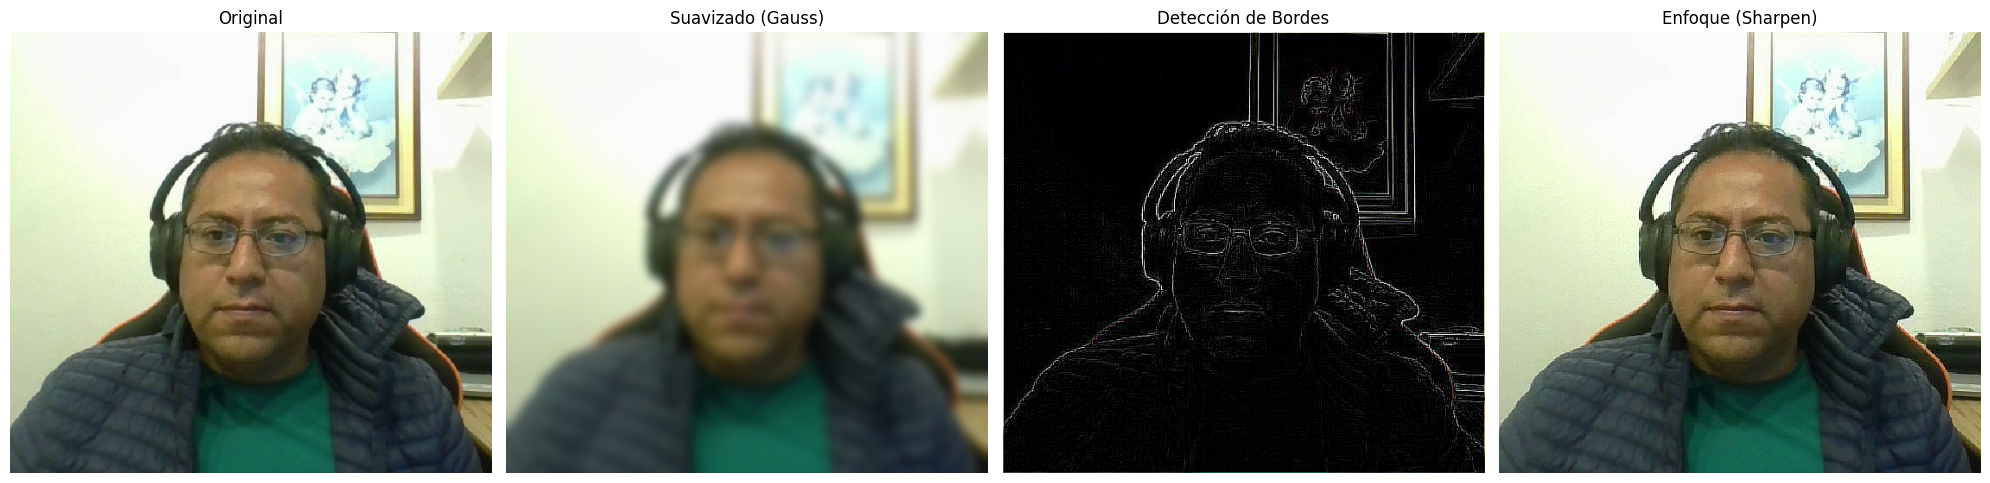

In [3]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

imagen = "C:/MAESTRIA/TEST/Imagenes/CapturaCamara.jpg"
# 1. Cargar la imagen
img = Image.open(imagen)

# --- OPERACIONES DE VECINDAD ---

# A. Suavizado (Blurring)
# Usa un kernel de promedio para "difuminar" la imagen
img_blur = img.filter(ImageFilter.BLUR)
# Para un control más fuerte, se puede usar GaussianBlur
img_gauss = img.filter(ImageFilter.GaussianBlur(radius=5))

# B. Detección de Bordes (Find Edges)
# Resalta las siluetas donde hay cambios bruscos de color
img_bordes = img.filter(ImageFilter.FIND_EDGES)

# C. Enfoque (Sharpening)
# Mejora el detalle en los bordes
img_enfoque = img.filter(ImageFilter.SHARPEN)

# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title("Original")

axs[1].imshow(img_gauss)
axs[1].set_title("Suavizado (Gauss)")

axs[2].imshow(img_bordes)
axs[2].set_title("Detección de Bordes")

axs[3].imshow(img_enfoque)
axs[3].set_title("Enfoque (Sharpen)")

for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()